In [1]:
import pymysql #Allows the connection to mysql
import pandas as pd #We need pandas to obtain a Data Frame
import getpass # function to prompt a cell to write down our password
from sqlalchemy import create_engine #Method to produce an engine based on a URL, that includes, host, user....

In [2]:
user = getpass.getuser()
password = getpass.getpass(prompt="Please enter your MySQL password",stream=None)
engine = create_engine('mysql+pymysql://{}:{}@localhost:3306/classicmodels'.format(user,password))
connection = pymysql.connect(host='localhost',user=user,password=password,db='classicmodels')

Please enter your MySQL password········


In [3]:
a="""SELECT 'Customers' AS 'Table', COUNT(*) AS Num_Rows FROM customers
UNION
SELECT 'Employees' AS 'Table', COUNT(*) AS Num_Rows FROM employees
UNION
SELECT 'Offices' AS 'Table', COUNT(*) AS Num_Rows FROM offices
UNION
SELECT 'Order Details' AS 'Table', COUNT(*) AS Num_Rows FROM orderdetails
UNION
SELECT 'Orders' AS 'Table', COUNT(*) AS Num_Rows FROM orders
UNION
SELECT 'Payments' AS 'Table', COUNT(*) AS Num_Rows FROM payments
UNION
SELECT 'Product Lines' AS 'Table', COUNT(*) AS Num_Rows FROM productlines
UNION
SELECT 'Products' AS 'Table', COUNT(*) AS Num_Rows FROM products;""" 

In [4]:
rowcount=pd.read_sql_query(a,engine)

In [5]:
pd.DataFrame(rowcount, columns=['Table', 'Num_Rows' ])
rowcount.sort_values(by='Num_Rows', ascending=False, inplace=True)

In [6]:
rowcount

,Table,Num_Rows
3,Order Details,2996
4,Orders,326
5,Payments,273
0,Customers,122
7,Products,110
1,Employees,23
2,Offices,7
6,Product Lines,7


In [7]:
df = pd.DataFrame(rowcount)

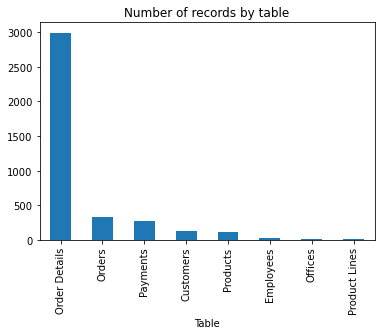

In [8]:
df.plot.bar(x='Table',y='Num_Rows',legend=None,title="Number of records by table");